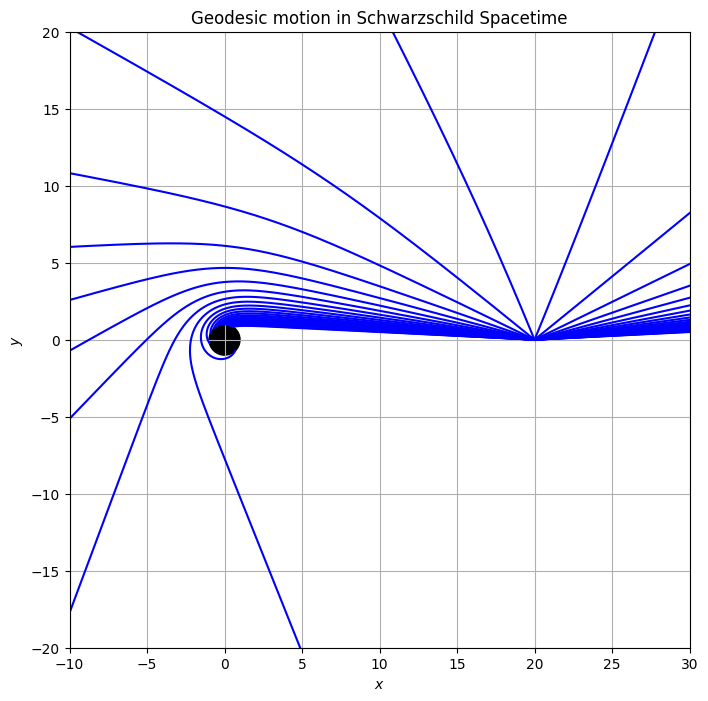

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Schwarzschild radius
rs = 1

def eh_crop(t,u):
    # crop at EH or divergence, and stop by erasing the derivative.
    #if (u[0]>rs*3):
    #   return [0,0]
    return [u[1], geodesic(u[0])]

def geodesic(u):
    return -u * (1 - (3/2) * rs * u)

# Range of initial conditions
r_initial = [20] #np.linspace(3, 10, 3)
du_0_values = np.linspace(-1, 1, 50)  # Varying initial tangential velocities

phi_start = 0
phi_max = 4 * np.pi 

plt.figure(figsize=(8, 8))

# Create a circle with the desired radius, center at (0, 0), and filled in
circle = plt.Circle((0, 0), rs, color='black', label='Central Mass')

# Add the circle to the plot
plt.gca().add_artist(circle)

for r_0 in r_initial:
    for du_0 in du_0_values:
        u_0 = 1 / r_0  # u = 1/r
        initial_conditions = [u_0, du_0]
    
        solution = solve_ivp(
            eh_crop,
            [phi_start, phi_max],        # Start and end points
            initial_conditions,          # Initial conditions
            method='RK45',                # Runge-Kutta
            max_step=1e-2,               # Maximum step size to control resolution
            rtol=1e-6,                   # Relative tolerance for accuracy
            atol=1e-9                    # Absolute tolerance for accuracy
        )

        u_values = solution.y[0]
        r_values = 1 / u_values
    
        # Remove unphysical values (e.g., r <= rs)
        valid_indices = np.where(r_values >= 1)[0]

        # Find the first index where the condition does not hold
        first_invalid_index = np.argmax(r_values < 1)
        valid_indices = valid_indices[valid_indices < first_invalid_index]
        
        r_values = r_values[valid_indices]
        phi_values_filtered = solution.t[valid_indices]
    
        # Convert to Cartesian coordinates
        x_values = r_values * np.cos(phi_values_filtered)
        y_values = r_values * np.sin(phi_values_filtered)
    
        # Plot trajectory
        plt.plot(x_values, y_values, label=f'du_0 = {du_0:.01f}', color='blue')

# Plot settings
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Geodesic motion in Schwarzschild Spacetime')
plt.grid()

# Set x and y axis limits
plt.xlim(-10, 30)
plt.ylim(-20, 20)

plt.show()


C:\Users\wilbj602\AppData\Local\Temp\ipykernel_25256\2716958967.py:9: RuntimeWarning: overflow encountered in scalar multiply
  return -u * (1 - (3 / 2) * rs * u)


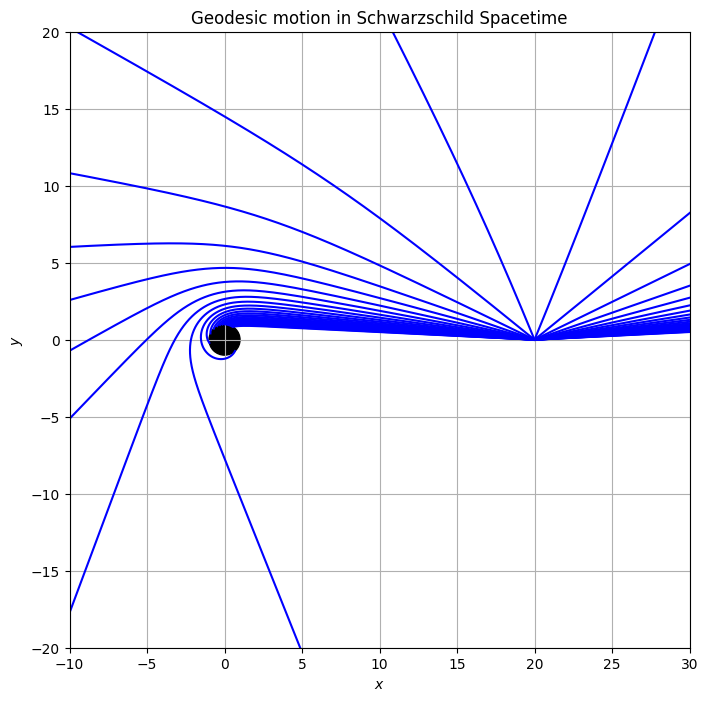

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Schwarzschild radius
rs = 1

# Geodesic function
def geodesic(u):
    return -u * (1 - (3 / 2) * rs * u)

# Define the system of differential equations (right-hand side)
def eh_crop(phi, u):
    return [u[1], geodesic(u[0])]

# RK4 Step function
def rk4_step(func, phi, y, h):
    k1 = np.array(func(phi, y))
    k2 = np.array(func(phi + 0.5 * h, y + 0.5 * k1 * h))
    k3 = np.array(func(phi + 0.5 * h, y + 0.5 * k2 * h))
    k4 = np.array(func(phi + h, y + k3 * h))
    
    # Return updated value
    return y + (k1 + 2*k2 + 2*k3 + k4) * h / 6

# Initial conditions
r_initial = [20]  # np.linspace(3, 10, 3)
du_0_values = np.linspace(-1, 1, 50)  # Varying initial tangential velocities
phi_start = 0
phi_max = 4 * np.pi
h = 0.001  # Step size for RK4

plt.figure(figsize=(8, 8))

# Create a circle with the desired radius, center at (0, 0), and filled in
circle = plt.Circle((0, 0), rs, color='black', label='Central Mass')

# Add the circle to the plot
plt.gca().add_artist(circle)

for r_0 in r_initial:
    for du_0 in du_0_values:
        u_0 = 1 / r_0  # u = 1/r
        initial_conditions = np.array([u_0, du_0])
    
        # Set up phi range
        phi_values = np.arange(phi_start, phi_max, h)
        y_values = np.zeros((len(phi_values), 2))
        y_values[0] = initial_conditions

        # Perform RK4 integration
        for i in range(1, len(phi_values)):
            phi = phi_values[i - 1]
            y = y_values[i - 1]
            y_values[i] = rk4_step(eh_crop, phi, y, h)

        u_values = y_values[:, 0]
        r_values = 1 / u_values  # Convert u to r

        # Remove unphysical values (e.g., r <= rs)
        valid_indices = np.where(r_values >= 1)[0]

        # Find the first index where the condition does not hold
        first_invalid_index = np.argmax(r_values < 1)
        valid_indices = valid_indices[valid_indices < first_invalid_index]
        
        r_values = r_values[valid_indices]
        phi_values = phi_values[valid_indices]
    
        # Convert to Cartesian coordinates
        x_values = r_values * np.cos(phi_values)
        y_values = r_values * np.sin(phi_values)
    
        # Plot trajectory
        plt.plot(x_values, y_values, label=f'du_0 = {du_0:.01f}', color='blue')

# Plot settings
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Geodesic motion in Schwarzschild Spacetime')
plt.grid()

# Set x and y axis limits
plt.xlim(-10, 30)
plt.ylim(-20, 20)

plt.show()
